# BATTLE OF THE NEGHBORHOODS

## importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
! pip install geocoder
! pip install geopy
! pip install BeautifulSoup4
!pip install folium
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
# library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans




print("Libraries imported.")

     |████████████████████████████████| 98 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 621 kB/s  eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=98e68858124642e33cf461d9492cf4a8df80177594be1a96124c7ff5170ef9ba
  Stored in directory: /home/jovyan/.cache/pip/wheels/6e/9c/ed/4499c9865ac1002697793e0ae05ba6be33553d098f3347fb94
Successfully built future
     |████████████████████████████████| 111 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 631 kB/s eta 0:00:01     |█████████████████████           | 61 kB 1.9 MB/s eta 0:00:01
Libraries imported.


In [2]:
! pip install beautifulsoup4
from bs4 import BeautifulSoup

import folium

In [4]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

# KING SAUD UNIVERSITY

## defining the credintials of King Saud University

In [6]:
KSU_LATITUDE = '24.7222'
KSU_LONGITUDE = '46.6259'
print('The geograpical coordinates of King Saud University are {}, {}.'.format(KSU_LATITUDE, KSU_LONGITUDE))

The geograpical coordinates of King Saud University are 24.7222, 46.6259.


## IMPORTING FOLIUM MAP OF THE LOCATION OF KSU

In [7]:

ksu_map = folium.Map(location = [KSU_LATITUDE, KSU_LONGITUDE], zoom_start = 10)
folium.Marker([KSU_LATITUDE, KSU_LONGITUDE]).add_to(ksu_map)

ksu_map

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
limit= 100 
radius= 4000

## Foursquare API

In [10]:
CLIENT_ID = 'LKZMSV4PK2PAPEGUCU50G2JYOSNZC1FMDKMADDSAWWJNMCRE' # your Foursquare ID
CLIENT_SECRET = 'W4HQSKQ51ATR0JI1GBXAFANJFNLL1X0SDX3KFPDRFE1UWJ2Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LKZMSV4PK2PAPEGUCU50G2JYOSNZC1FMDKMADDSAWWJNMCRE
CLIENT_SECRET:W4HQSKQ51ATR0JI1GBXAFANJFNLL1X0SDX3KFPDRFE1UWJ2Q


In [11]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        KSU_LATITUDE, 
                                                                        KSU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
            

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f145036f5887b505197462c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Riyadh',
  'headerFullLocation': 'Riyadh',
  'headerLocationGranularity': 'city',
  'totalResults': 232,
  'suggestedBounds': {'ne': {'lat': 24.758200036000037,
    'lng': 46.665458507277755},
   'sw': {'lat': 24.686199963999965, 'lng': 46.58634149272225}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5a807664a35dce7538f42b19',
       'name': 'Hilal F.C. Stadium (استاد نادي الهلال)',
       'location': {'address': 'King Saud University',
        'crossStreet': 'Hassan Al Ashieck St.',
        'lat': 24.729919791637855,
        'lng': 46.622849720901115,
        'label

## IMPORTING THE DATA FRAME

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Hilal F.C. Stadium (استاد نادي الهلال),Soccer Stadium,24.729920,46.622850
1,dr.CAFE COFFEE | د. كيف,Coffee Shop,24.723008,46.619754
2,Starbucks (ستاربكس),Coffee Shop,24.712048,46.623012
3,Subway (صب واي),Sandwich Place,24.714673,46.634549
4,Dunkin' Donuts (دانكن دونتس),Donut Shop,24.713287,46.633717
5,عنوان القهوة The Coffee Address (عنوان القهوة),Coffee Shop,24.708918,46.628566
6,Muvi Cinemas,Movie Theater,24.735758,46.632082
7,Symposium,Greek Restaurant,24.736818,46.631466
8,66 Cups,Coffee Shop,24.735953,46.631425
9,Bicicleta (بسكلته),Coffee Shop,24.736767,46.630348


In [14]:
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)

100

### importing a map for the 100 nearby venues 

In [15]:
locationlist[7]
map = folium.Map(location=[24.7222, 46.6259], zoom_start=12)

for point in range(0, len(locationlist)):
    folium.CircleMarker(locationlist[point], line_color='#3186cc',fill_color='#3186cc', popup=nearby_venues['name'][point]).add_to(map)
map





### Importing the unique catagories in a separate dataframe

In [16]:
KSU_categories= nearby_venues['categories']
KSU_categories_df = pd.DataFrame(KSU_categories)
KSU_categories_df

,categories
0,Soccer Stadium
1,Coffee Shop
2,Coffee Shop
3,Sandwich Place
4,Donut Shop
5,Coffee Shop
6,Movie Theater
7,Greek Restaurant
8,Coffee Shop
9,Coffee Shop


In [17]:
KSU_unique_categories=pd.DataFrame(KSU_categories_df.categories.unique())
KSU_unique_categories_counts= nearby_venues["categories"].value_counts

In [18]:

KSU_unique_categories_counts
KSU_unique_categories.count()

0    47
dtype: int64

### WE DEFINE A NEW DATAFRAME TO COUNT THE DIFFERENT VENUES CATTEGORRIES (KSU)

In [19]:
KSU_unique_categories_counts=pd.DataFrame(nearby_venues['categories'].value_counts())
KSU_unique_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

KSU_unique_categories_counts.index.name ='Categories'
KSU_unique_categories_counts

,value_counts
Categories,
Coffee Shop,14
Café,5
Dessert Shop,4
Plaza,4
Park,4
Food Truck,4
Gym,4
Donut Shop,3
Breakfast Spot,3


In [20]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


## plotting the categorries dataframe in bar charts 


<function matplotlib.pyplot.show(*args, **kw)>

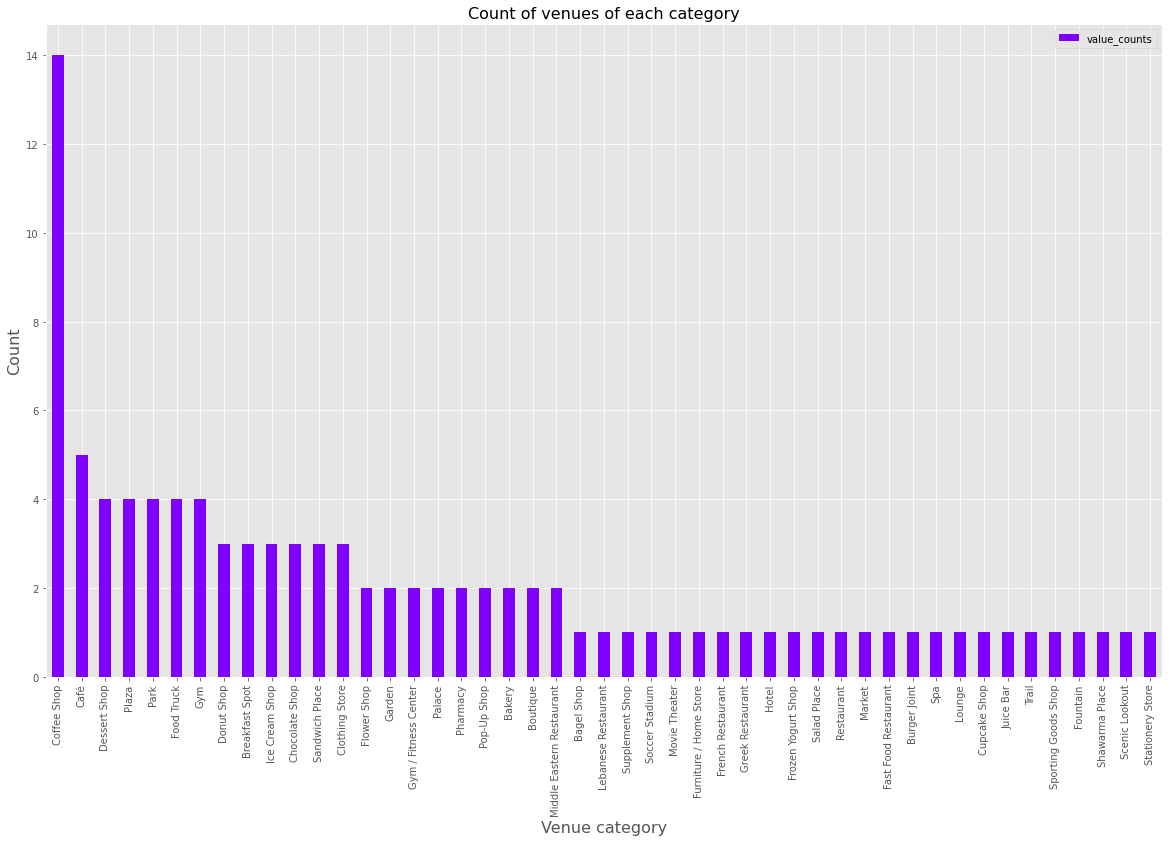

In [21]:
colors = cm.rainbow(np.linspace(0, 1, len(KSU_unique_categories_counts.index)))

KSU_unique_categories_counts.plot(kind='bar', figsize=(20,12), color= colors)


plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)

plt.show

### seperating the restaurants 

In [22]:

Restaurants= KSU_categories_df[KSU_categories_df['categories'].str.contains("Restaurant")]

Restaurants

,categories
7,Greek Restaurant
11,Restaurant
69,Middle Eastern Restaurant
75,Fast Food Restaurant
82,Lebanese Restaurant
89,Middle Eastern Restaurant
90,French Restaurant


In [23]:
Res_counts= pd.DataFrame(Restaurants['categories'].value_counts())
Res_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

Res_counts.index.name ='Categories'
Res_counts.astype('int')
Res_counts.sum()

value_counts    7
dtype: int64

## filtering different similar words and putting similar categories together

In [24]:

shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Shop")]

KSU_shops_counts= pd.DataFrame(shops['categories'].value_counts())
KSU_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
KSU_shops_counts

,value_counts
Coffee Shop,14
Dessert Shop,4
Donut Shop,3
Chocolate Shop,3
Ice Cream Shop,3
Flower Shop,2
Pop-Up Shop,2
Sporting Goods Shop,1
Supplement Shop,1
Frozen Yogurt Shop,1


## counting the number of coffee shops near the university 

In [25]:
coffee =KSU_categories_df[KSU_categories_df['categories'].str.contains("Coffee")]


KSU_coffee_counts= pd.DataFrame(coffee['categories'].value_counts())
KSU_coffee_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

coffee.index.name ='Categories'
KSU_coffee_counts



cafe =KSU_categories_df[KSU_categories_df['categories'].str.contains("Café")]


KSU_cafe_counts= pd.DataFrame(cafe['categories'].value_counts())
KSU_cafe_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

cafe.index.name ='Categories'
KSU_cafe_counts

frames = [KSU_cafe_counts, KSU_coffee_counts]

coffee_shops = pd.concat(frames)
coffee_shops

,value_counts
Café,5
Coffee Shop,14


In [26]:
coffee_shops.sum()

value_counts    19
dtype: int64

In [51]:

shops = KSU_categories_df[KSU_categories_df['categories'].str.contains("Shop")]

shops_counts= pd.DataFrame(shops['categories'].value_counts())
shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

shops.index.name ='Categories'
shops_counts

,value_counts
Coffee Shop,14
Dessert Shop,4
Donut Shop,3
Chocolate Shop,3
Ice Cream Shop,3
Flower Shop,2
Pop-Up Shop,2
Sporting Goods Shop,1
Supplement Shop,1
Frozen Yogurt Shop,1


In [58]:
KSU_shops=shops_counts.drop(['Pop-Up Shop','Flower Shop','Sporting Goods Shop','Supplement Shop','Frozen Yogurt Shop','Bagel Shop','Coffee Shop'])
KSU_shops

,value_counts
Dessert Shop,4
Donut Shop,3
Chocolate Shop,3
Ice Cream Shop,3
Cupcake Shop,1


In [59]:

KSU_shops.sum()

value_counts    14
dtype: int64

###### as we see above , we have 19 coffee shops near KSU  and 14 dessert related shops such as donuts, cupcakes and ice cream


# Imam Muhammad ibn Saud Islamic University


## defining the credintials of Imam University

In [28]:
IMU_LATITUDE = '24.8072'
IMU_LONGITUDE = '46.6984'
print('The geograpical coordinates of Imam Muhammad ibn Saud Islamic University are {}, {}.'.format(IMU_LATITUDE, IMU_LONGITUDE))

The geograpical coordinates of Imam Muhammad ibn Saud Islamic University are 24.8072, 46.6984.


## IMPORTING FOLIUM MAP OF THE LOCATION OF IMAMU

In [29]:

imu_map = folium.Map(location = [IMU_LATITUDE, IMU_LONGITUDE], zoom_start = 10)
folium.Marker([IMU_LATITUDE, IMU_LONGITUDE]).add_to(imu_map)

imu_map

In [30]:
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, 
                                                                        CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        IMU_LATITUDE, 
                                                                        IMU_LONGITUDE, 
                                                                        radius,
                                                                        limit)
                                                            
            

In [31]:
results2= requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5f1455a56b547043a1507eec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Riyadh',
  'headerFullLocation': 'Riyadh',
  'headerLocationGranularity': 'city',
  'totalResults': 224,
  'suggestedBounds': {'ne': {'lat': 24.843200036000038,
    'lng': 46.73798558953001},
   'sw': {'lat': 24.771199963999965, 'lng': 46.65881441046999}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5155aaffe4b0ea6b60f6a57a',
       'name': 'Baskin Robbins (باسكن روبنز)',
       'location': {'address': 'Uthman Ibn Affan Rd',
        'lat': 24.80616697768597,
        'lng': 46.69291662113471,
        'labeledLatLngs': [{'label': 'display',
          'lat': 24.80616697

In [32]:
imu_venues = results2['response']['groups'][0]['items']
    
imu_nearby_venues = json_normalize(imu_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
imu_nearby_venues =imu_nearby_venues.loc[:, filtered_columns]

# filter the category for each row
imu_nearby_venues['venue.categories'] = imu_nearby_venues.apply(get_category_type, axis=1)

# clean columns
imu_nearby_venues.columns = [col.split(".")[-1] for col in imu_nearby_venues.columns]

imu_nearby_venues

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Baskin Robbins (باسكن روبنز),Ice Cream Shop,24.806167,46.692917
1,Fortore (فورتوري),Shopping Mall,24.802786,46.694598
2,Starbucks (ستاربكس),Coffee Shop,24.805699,46.693231
3,Dunkin' Donuts (دانكن دونتس),Donut Shop,24.806280,46.692752
4,Boots Pharmacy (صيدلية بوتس),Pharmacy,24.806269,46.692899
5,Fitness Time (وقت اللياقة),Gym / Fitness Center,24.801235,46.694283
6,Half Million,Coffee Shop,24.803221,46.694836
7,Java Time,Coffee Shop,24.804298,46.694163
8,Torta And More (تورتا آند مور),Bakery,24.805870,46.693021
9,BARASINGHA (باراسينقا),Coffee Shop,24.804814,46.693722


In [33]:
imu_categories= imu_nearby_venues['categories']
imu_categories_df = pd.DataFrame(imu_categories)
imu_categories_df

,categories
0,Ice Cream Shop
1,Shopping Mall
2,Coffee Shop
3,Donut Shop
4,Pharmacy
5,Gym / Fitness Center
6,Coffee Shop
7,Coffee Shop
8,Bakery
9,Coffee Shop


In [34]:
Imu_categories=pd.DataFrame(imu_categories_df.categories.unique())
Imu_categories_counts= imu_nearby_venues["categories"].value_counts


In [35]:
Imu_categories_counts



imu_categories_counts=pd.DataFrame(imu_nearby_venues['categories'].value_counts())
imu_categories_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_categories_counts.index.name ='Categories'
imu_categories_counts

,value_counts
Categories,
Coffee Shop,25
Donut Shop,6
Dessert Shop,5
Restaurant,4
Gym / Fitness Center,3
Café,3
Ice Cream Shop,3
Pharmacy,3
Hotel,2


### PLOTTING THE CATEGORIAL DATAFRAME INTO A BAR CHART (IMU)

Text(0, 0.5, 'number of venues')

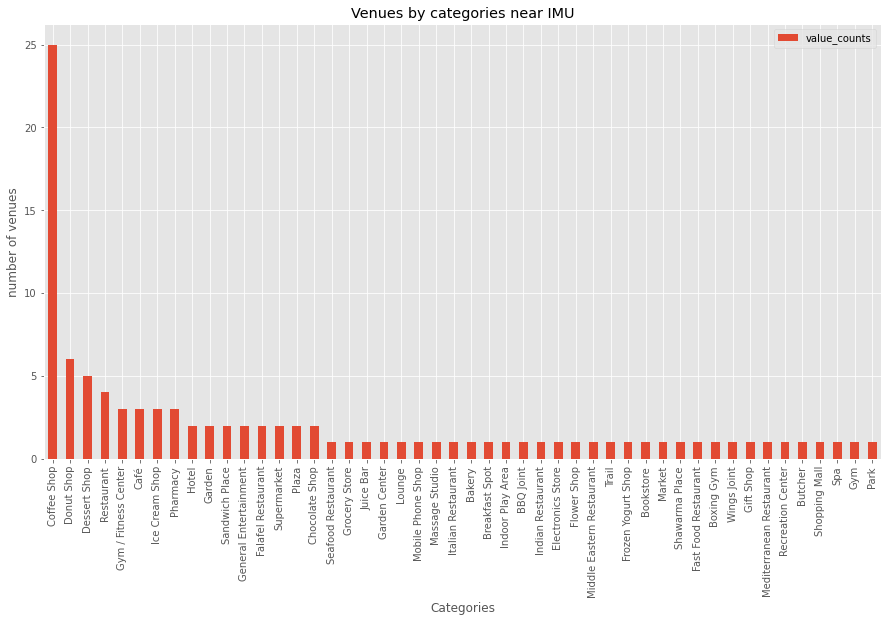

In [36]:
imu_categories_counts.plot(kind='bar', figsize=(15,8))
plt.title('Venues by categories near IMU')
plt.xlabel('Categories')
plt.ylabel('number of venues')


we can see similar categorries seperated such as (coffe shops and cafes) so we will be puttinng them in one data frame together to count them 

In [39]:
IMUcoffee =imu_categories_df[imu_categories_df['categories'].str.contains("Coffee")]


IMU_coffee_counts= pd.DataFrame(IMUcoffee['categories'].value_counts())
IMU_coffee_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

IMUcoffee.index.name ='Categories'
IMU_coffee_counts



IMUcafe =imu_categories_df[imu_categories_df['categories'].str.contains("Café")]


IMU_cafe_counts= pd.DataFrame(IMUcafe['categories'].value_counts())
IMU_cafe_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

IMUcafe.index.name ='Categories'
IMU_cafe_counts

IMUframes = [IMU_cafe_counts, IMU_coffee_counts]

IMU_coffee_shops = pd.concat(IMUframes)
IMU_coffee_shops

,value_counts
Café,3
Coffee Shop,25


In [40]:
IMU_coffee_shops.sum()

value_counts    28
dtype: int64

In [42]:

imu_shops = imu_categories_df[imu_categories_df['categories'].str.contains("Shop")]

imu_shops_counts= pd.DataFrame(imu_shops['categories'].value_counts())
imu_shops_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_shops.index.name ='Categories'
imu_shops_counts


,value_counts
Coffee Shop,25
Donut Shop,6
Dessert Shop,5
Ice Cream Shop,3
Chocolate Shop,2
Gift Shop,1
Shopping Mall,1
Frozen Yogurt Shop,1
Mobile Phone Shop,1
Flower Shop,1


In [46]:
dessert_imu=imu_shops_counts.drop(['Shopping Mall','Flower Shop','Mobile Phone Shop','Gift Shop','Frozen Yogurt Shop','Coffee Shop'])
dessert_imu

,value_counts
Donut Shop,6
Dessert Shop,5
Ice Cream Shop,3
Chocolate Shop,2


In [48]:
dessert_imu.sum()

value_counts    16
dtype: int64

##### we have 16 dessert related shops near IMAMU 

In [60]:

Restaurants_imu= imu_categories_df[imu_categories_df['categories'].str.contains("Restaurant")]

Restaurants_imu


imu_Res_counts= pd.DataFrame(Restaurants_imu['categories'].value_counts())
imu_Res_counts.rename(columns={'categories':'value_counts'} , 
                 inplace=True)
 

imu_Res_counts.index.name ='Categories'
imu_Res_counts

,value_counts
Categories,
Restaurant,4
Falafel Restaurant,2
Fast Food Restaurant,1
Seafood Restaurant,1
Italian Restaurant,1
Indian Restaurant,1
Middle Eastern Restaurant,1
Mediterranean Restaurant,1


In [61]:
imu_Res_counts['value_counts'].astype('int')
imu_Res_counts.sum()

value_counts    12
dtype: int64

# conclusion 

### we can see that openning a cafe which is specialized in desserts and coffee in Neighborhood 1 (near King Saud University) is a better option according to the high number of coffee shops and dessert shops in Neighborhood 2 (near Imam Muhammad ibn Saud Islamic University).

### As for the Restaurants both Areas have low number of Resturants, 7 or 12 are not considered a high numbers in such areas where a high number of employees and students visit everyday. 